In [317]:
from os.path import join
import numpy as np

from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor


## 1. 데이터 불러오기

In [318]:
datapath = join('data','abalone.txt')
labelpath = join('data','abalone_attributes.txt')

#txt파일 읽기
columns = list()
with open(labelpath, 'r') as f:
    columns = f.read().split('\n')
    
# cloumns = attribute    
df = pd.read_csv(datapath, names = columns)
del df['Sex']

Y = df['Rings']
del df['Rings']

X = df

In [319]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


## 2. 데이터 전처리

In [320]:
#Min-Max 정규화
for dim in X:
        X[dim] -= np.min(X[dim])
        X[dim] /= np.max(X[dim])

In [321]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.606746,0.593078,0.123466,0.292808,0.241000,0.237121,0.236503
std,0.162288,0.166790,0.037015,0.173681,0.149269,0.144324,0.138717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.506757,0.495798,0.101770,0.155658,0.124412,0.122449,0.128052
50%,0.635135,0.621849,0.123894,0.282451,0.225286,0.224490,0.231689
75%,0.729730,0.714286,0.146018,0.407650,0.336920,0.332456,0.326358
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


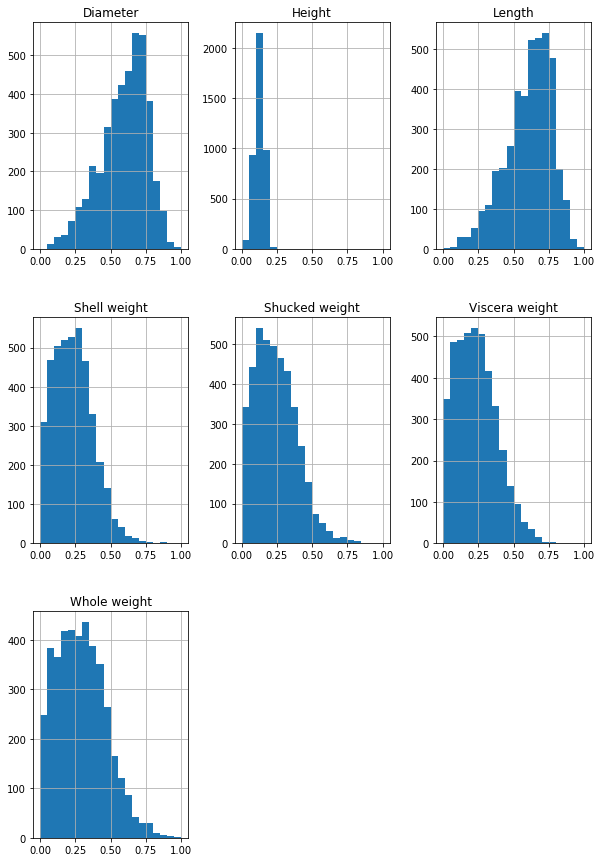

In [322]:
X.hist(bins = 20, figsize=(10, 15))
plt.show()

## 3. Regression 

### 3.1 LinearRegression

In [323]:
# 선형회귀 추정기 생성
lr = linear_model.LinearRegression() 

In [324]:
label = 'Length'
#X = df[[label]]

#X_train, X_test, Y_train, Y_test = train_test_split(diabetes_X, df_rings, test_size=0.3, random_state = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:,:], Y, test_size=0.3, random_state = 1)

# input 대해 선형 회귀(모델 파라미터 추정)
X_train = X_train.values.tolist()
Y_train = Y_train.values.tolist()
lr = lr.fit(X_train, Y_train)

In [325]:
# 회귀식으로 데이터의 결과 추정
lr_Y_pred = lr.predict(X_test)

--------input x-------------
--------prediction-----------
[8.61789619 6.98515526 7.73778577 ... 8.44766485 8.65767225 5.94839277]


In [326]:
# R2 scroe
R2 = r2_score(Y_test, lr_Y_pred)
n = len(Y_test)
p = len(X_test.iloc[0])
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print('Adj R2 score: %.2f' % Adj_r2)
#print('R2 score: %.2f' % r2_score(Y_test, lr_Y_pred))


Adj R2 score: 0.51


### 3.2 DecisionTreeRgression

In [306]:
# 결정트리 회귀 모델 생성
tr = DecisionTreeRegressor(max_depth=6)

In [307]:
tr.fit(X_train, Y_train)
tr_Y_pred = tr.predict(X_test)

In [309]:
print('R2 score: %.2f' % r2_score(Y_test, tr_Y_prediction))

R2 score: 0.34


### 3.3 NN Regression

In [329]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), random_state=1)
nn_model.fit(X=X_train, y=Y_train)

nn_Y_pred = nn_model.predict(X=X_test)


print("학습 세트 정확도: {:.3f}%".format(nn_model.score(X_train, Y_train) * 100))
print('R2 score: %.2f' % r2_score(Y_test, nn_Y_pred))

학습 세트 정확도: 28.806%
R2 score: 0.42
